In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "leapGestRecog/leapGestRecog/"

In [3]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

This loop iterates through each subdirectory (gesture category) in the dataset, reads the grayscale image using OpenCV, resizes it to IMG_SIZE, and appends the resized image along with its class index to the image_data list.

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

Shuffling the image_data list randomly. This is done to ensure that the model does not learn any ordering in the dataset.

In [5]:
input_data = []
label = []
for x,y in image_data:
    input_data.append(x)
    label.append(y)

Separating the image data and labels from the image_data list and storing them in input_data and label lists, respectively.

In [6]:
label[:10]

[4, 6, 0, 9, 6, 6, 6, 9, 5, 1]

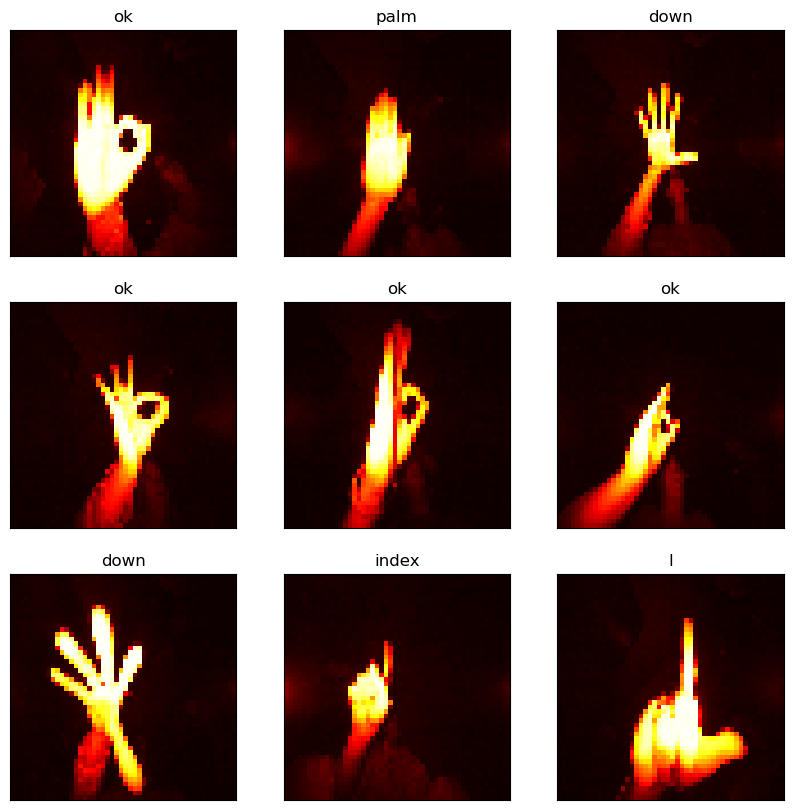

In [7]:
plt.figure(1,figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0],cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

Displaying a sample of 9 images along with their labels. This code uses matplotlib to plot images.

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
print(label)
input_data = input_data/255.0
input_data.shape

[4 6 0 ... 0 3 2]


(20000, 50, 50)

Converting input_data and label lists to numpy arrays and normalizing the image data by dividing by 255 to scale the pixel values between 0 and 1.

In [9]:
# one hot encoding
from keras.utils import to_categorical
label = to_categorical(label)
label[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

Converting categorical labels into one-hot encoded format using Keras's to_categorical function.

In [10]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

Splitting the dataset into training and testing sets using train_test_split function from scikit-learn.

The code continues with defining and training a convolutional neural network model using Keras, and then evaluates its performance. Finally, it visualizes the model's performance using matplotlib.

This script is essentially a complete pipeline for image classification using a convolutional neural network. It loads the dataset, preprocesses the images, defines the model architecture, trains the model, evaluates its performance, and visualizes the results.

In [12]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 154s 339ms/step - accuracy: 0.6943 - loss: 0.9032 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 162s 243ms/step - accuracy: 0.9902 - loss: 0.0265 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 138s 231ms/step - accuracy: 0.9956 - loss: 0.0123 - val_accuracy: 0.9990 - val_loss: 0.0037
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 100s 227ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.9974 - loss: 0.0063 - val_accuracy: 0.9997 - val_loss: 0.0037
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 101s 231ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9960 - val_loss: 0.0168
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 210ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.9973 - val_loss: 0.0131


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape     ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)        │ (None, 48, 48,   │       320 │
│                        │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ activation             │ (None, 48, 48,   │         0 │
│ (Activation)           │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ conv2d_1 (Conv2D)      │ (None, 46, 46,   │     9,248 │
│                        │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ activation_1           │ (None, 46, 46,   │         0 │
│ (Activation)           │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ max_pooling2d          │ (None, 23, 23,   │         0 │
│ (MaxPooling2D)         │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ dropout (Dropout)      │ (None, 23, 23,   │         0 │
│                        │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ conv2d_2 (Conv2D)      │ (None, 21, 21,   │    18,496 │
│                        │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ activation_2           │ (None, 21, 21,   │         0 │
│ (Activation)           │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ max_pooling2d_1        │ (None, 10, 10,   │         0 │
│ (MaxPooling2D)         │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ dropout_1 (Dropout)    │ (None, 10, 10,   │         0 │
│                        │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ flatten (Flatten)      │ (None, 6400)     │         0 │
├────────────────────────┼──────────────────┼───────────┤
│ dense (Dense)          │ (None, 256)      │ 1,638,656 │
├────────────────────────┼──────────────────┼───────────┤
│ dense_1 (Dense)        │ (None, 10)       │     2,570 │
└────────────────────────┴──────────────────┴───────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

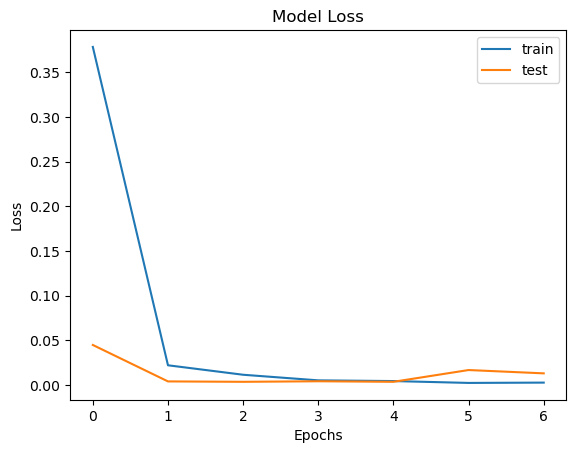

In [15]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

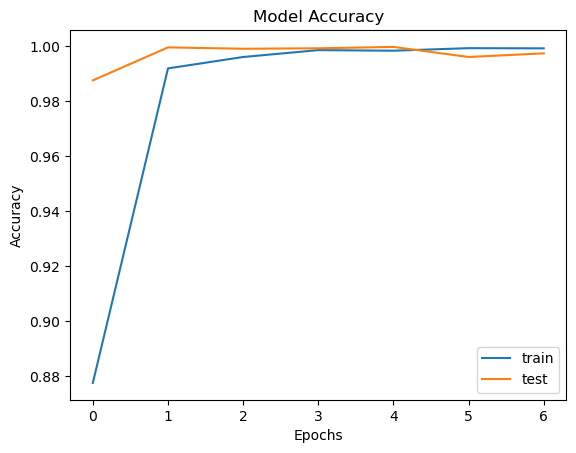

In [16]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9979 - loss: 0.0096
Test accuracy: 99.73%


Confusion matrix

188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step


[]

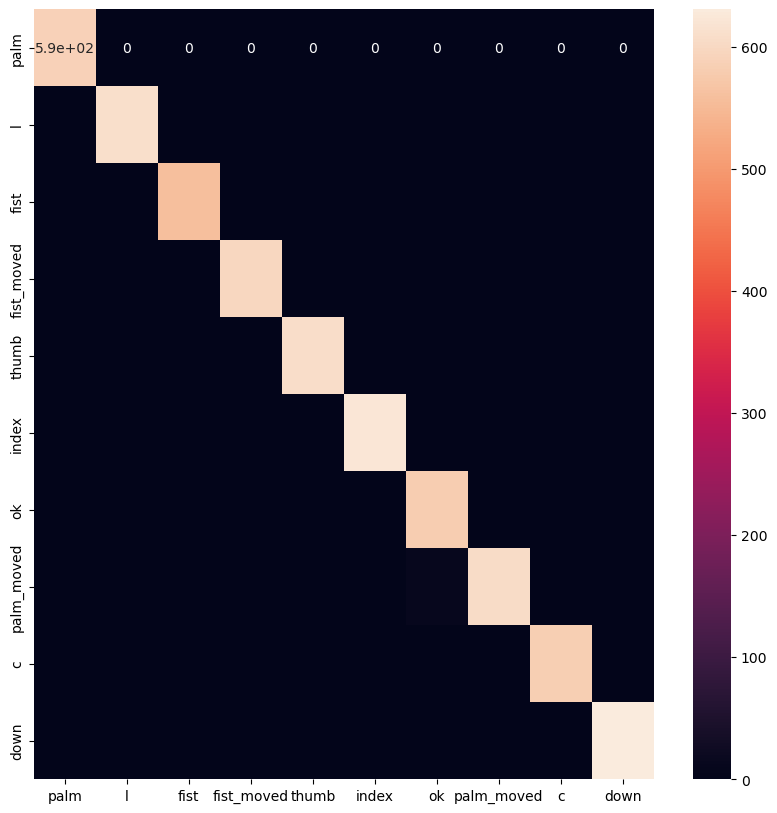

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()